In [1]:
import sys
sys.path[:]
sys.path.insert(0, '/mnt/home/landerson/.local/lib/python3.6/site-packages')
import pynbody

/cm/shared/sw/pkg-old/devel/python3/3.6.2/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dir = '/mnt/ceph/users/firesims/ananke/Latte/m12m/snapdir_600/'
filename = 'snapshot_600'

In [3]:
sim = pynbody.load(dir+filename)

/mnt/home/landerson/.local/lib/python3.6/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/mnt/home/landerson/.local/lib/python3.6/site-packages/pynbody/snapshot/gadgethdf.py:573: RuntimeWarning: No unit information found: using gadget-units.
  "No unit information found: using gadget-units.", RuntimeWarning)


In [4]:
sim

<SimSnap "/mnt/ceph/users/firesims/ananke/Latte/m12m/snapdir_600/snapshot_600" len=282974393>

In [5]:
sim.properties

{'CompactLevel': 0,
 'Compactify_Version': 'v0.2',
 'Flag_Cooling': 1,
 'Flag_DoublePrecision': 0,
 'Flag_Feedback': 1,
 'Flag_IC_Info': 3,
 'Flag_Metals': 15,
 'Flag_Sfr': 1,
 'Flag_StellarAge': 1,
 'MassTable': array([0., 0., 0., 0., 0., 0.]),
 'NumFilesPerSnapshot': 8,
 'NumPart_ThisFile': array([12287337, 15681167,  1156375,        0,  2907365,        0],
       dtype=int32),
 'NumPart_Total': array([116752958, 140876456,  10063684,         0,  25344979,         0],
       dtype=uint32),
 'NumPart_Total_HighWord': array([0, 0, 0, 0, 0, 0], dtype=uint32),
 'ReadMe': 'This snapshot is part of the Feedback in Realistic Environments (FIRE) project -- Use, modification, or distribution only permitted with approval of the PI and the FIRE team -- No warranty, use at your own risk -- compactify_hdf5 (c) RF 2018',
 'Redshift': 0.0,
 'a': 1.0,
 'boxsize': Unit("6.00e+04 kpc a h**-1"),
 'h': 0.702,
 'omegaL0': 0.728,
 'omegaM0': 0.272,
 'time': Unit("1.38e+01 Gyr")}

In [7]:
sim.unit

AttributeError: 'GadgetHDFSnap' object has no attribute 'unit'

In [9]:
sim.gas['mass'].units

Unit("1.00e+10 Msol h**-1")

In [8]:
sim.gas['x'].units

Unit("kpc a h**-1")

In [17]:
sim.dark['x'].abs().max()

SimArray(40855.07253305, 'kpc')

In [20]:
blah = pynbody.analysis.halo.center(sim.gas,vel=False)

In [22]:
sim.dark['x'].abs().min()

SimArray(2.04001486e-07, 'kpc')

In [15]:
sim.physical_units()

In [75]:
sim.original_units()

In [11]:
import numpy as np

In [12]:
np.min(np.abs(sim.gas['y']))

SimArray(22006.70451105, 'kpc a h**-1')

In [24]:
pynbody.plot.image(sim.gas, qty='rho', threaded=False)

SimArray([[ 23608.521,  23651.838,  23695.154, ..., 341265.94 ,
           345980.12 , 350694.3  ],
          [ 23579.764,  23622.121,  23664.479, ..., 341088.44 ,
           345823.94 , 350559.44 ],
          [ 23551.008,  23592.404,  23633.803, ..., 340910.9  ,
           345667.75 , 350424.6  ],
          ...,
          [ 75173.555,  75946.77 ,  76719.99 , ...,  14089.778,
            14087.451,  14085.125],
          [ 74193.266,  74967.34 ,  75741.414, ...,  14074.972,
            14073.712,  14072.452],
          [ 73212.984,  73987.914,  74762.836, ...,  14060.165,
            14059.972,  14059.778]], dtype=float32, 'Msol kpc**-3')

In [28]:
pynbody.plot.image?

Signature: pynbody.plot.image(sim, qty='rho', width='10 kpc', resolution=500, units=None, log=True, vmin=None, vmax=None, av_z=False, filename=None, z_camera=None, clear=True, cmap=None, title=None, qtytitle=None, show_cbar=True, subplot=False, noplot=False, ret_im=False, fill_nan=True, fill_val=0.0, linthresh=None, **kwargs)
Docstring:
Make an SPH image of the given simulation.

**Keyword arguments:**

*qty* (rho): The name of the array to interpolate

*width* (10 kpc): The overall width and height of the plot. If
 ``width`` is a float or an int, then it is assumed to be in units
 of ``sim['pos']``. It can also be passed in as a string
 indicating the units, i.e. '10 kpc', in which case it is
 converted to units of ``sim['pos']``.

*resolution* (500): The number of pixels wide and tall

*units* (None): The units of the output

*av_z* (False): If True, the requested quantity is averaged down
        the line of sight (default False: image is generated in
        the thin plane z=0, unl

SimArray([[ 2857496.2,  2837097.5,  2816699.2, ...,  1480249.8,
            1347062. ,  1213874.6],
          [ 3302408.5,  3290248.5,  3278089.5, ...,  1633502.4,
            1500607.1,  1367711.6],
          [ 3747320.8,  3743401. ,  3739479.5, ...,  1786755. ,
            1654151.9,  1521548.9],
          ...,
          [23330982. , 25819584. , 28308186. , ...,  8997551. ,
            8504339. ,  8011128. ],
          [17726858. , 19280682. , 20834512. , ...,  9040721. ,
            8518414. ,  7996107. ],
          [12122731. , 12741786. , 13360838. , ...,  9083890. ,
            8532489. ,  7981088. ]], dtype=float32, 'Msol kpc**-3')

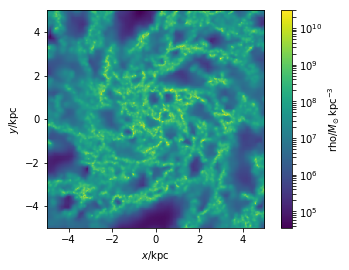

In [26]:
pynbody.plot.faceon_image(sim.gas)

SimArray([[17295.158, 17297.473, 17299.79 , ..., 15341.798, 15295.941,
           15250.077],
          [17306.752, 17308.922, 17311.09 , ..., 15515.022, 15467.895,
           15420.77 ],
          [17318.348, 17320.371, 17322.389, ..., 15688.247, 15639.854,
           15591.461],
          ...,
          [45054.527, 45579.07 , 46103.625, ..., 19413.475, 19394.088,
           19374.7  ],
          [44618.38 , 45133.63 , 45648.875, ..., 19219.459, 19196.738,
           19174.02 ],
          [44182.234, 44688.184, 45194.125, ..., 19025.451, 18999.389,
           18973.334]], dtype=float32, 'Msol kpc**-3')

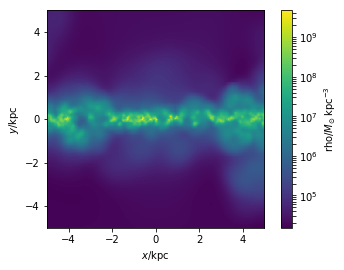

In [27]:
pynbody.plot.sideon_image(sim.gas)

In [12]:
sim.all_keys()

['u',
 'p',
 'HII',
 'HeIII',
 'ne',
 'rho_ne',
 'dm',
 'cosmodm',
 'redshift',
 'doppler_redshift',
 'em',
 'halpha',
 'c_n_sq',
 'hetot',
 'hydrogen',
 'HI',
 'HIeos',
 'HID12',
 'HeI',
 'HeII',
 'OI',
 'OII',
 'OVI',
 'CIV',
 'NV',
 'SIV',
 'MGII',
 'feh',
 'sixh',
 'sxh',
 'mgxh',
 'oxh',
 'nexh',
 'cxh',
 'caxh',
 'nxh',
 'ofe',
 'mgfe',
 'nefe',
 'sife',
 'smooth',
 'rho',
 'r',
 'rxy',
 'vr',
 'v2',
 'vt',
 'ke',
 'te',
 'j',
 'j2',
 'jz',
 'vrxy',
 'vcxy',
 'vphi',
 'vtheta',
 'v_mean',
 'v_disp',
 'age',
 'u_mag',
 'u_lum_den',
 'b_mag',
 'b_lum_den',
 'v_mag',
 'v_lum_den',
 'r_mag',
 'r_lum_den',
 'i_mag',
 'i_lum_den',
 'j_mag',
 'j_lum_den',
 'h_mag',
 'h_lum_den',
 'k_mag',
 'k_lum_den',
 'U_mag',
 'U_lum_den',
 'B_mag',
 'B_lum_den',
 'V_mag',
 'V_lum_den',
 'R_mag',
 'R_lum_den',
 'I_mag',
 'I_lum_den',
 'J_mag',
 'J_lum_den',
 'H_mag',
 'H_lum_den',
 'K_mag',
 'K_lum_den',
 'theta',
 'alt',
 'az',
 'cs',
 'mu',
 'p',
 'u',
 'temp',
 'zeldovich_offset',
 'aform',
 'tfor

In [13]:
sim['x']

SimArray([26649.53054413, 26650.36617036, 26650.6128479 , ...,
          26362.59664787, 26362.55895669, 26362.6498881 ], 'Mpc a h**-1')